# Проект "определение перспективного тарифа для телеком-компании"

Получены данные компании «Мегалайн» — федерального оператора сотовой связи. Задача сделать предварительный анализ тарифов на небольшой выборке клиентов. Кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Цели проекта выяснить:

1. Какой тариф приносит больше денег? 


2. Какой тариф лучше? 

# Описание тарифов 

**Тариф «Смарт»**


        Ежемесячная плата: 550 рублей
        Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
        Стоимость услуг сверх тарифного пакета:
        минута разговора: 3 рубля
        сообщение: 3 рубля
        1 Гб интернет-трафика: 200 рублей


**Тариф «Ультра»**


        Ежемесячная плата: 1950 рублей
        Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
        Стоимость услуг сверх тарифного пакета:
        минута разговора: 1 рубль
        сообщение: 1 рубль
        1 Гб интернет-трафика: 150 рублей

# Краткий план выполнения проекта:

**Привести данные к нужным типам, исправить ошибки в таблицах;**

**Для каждого пользователя расчитать:**
       
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

**Анализ данных**

- сколько минут разговора требуется пользователям каждого тарифа в месяц;
- сколько сообщений требуется пользователям каждого тарифа в месяц;
- какой объём интернет-трафика требуется пользователям каждого тарифа в месяц; 
- посчитать среднее количество, дисперсию и стандартное отклонение;
- построить гистограммы.

**Проверка гипотез:**

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Общий вывод и рекомендации**

## Изучение данных из файла

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [2]:
# открываем файл
try:
    df1 = pd.read_csv('/jupyter-notebook/Project4/calls.csv')
    df2 = pd.read_csv('/jupyter-notebook/Project4/internet.csv')
    df3 = pd.read_csv('/jupyter-notebook/Project4/messages.csv')
    df4 = pd.read_csv('/jupyter-notebook/Project4/tariffs.csv')
    df5 = pd.read_csv('/jupyter-notebook/Project4/users.csv')
except:
    df1 = pd.read_csv('/datasets/calls.csv')
    df2 = pd.read_csv('/datasets/internet.csv')
    df3 = pd.read_csv('/datasets/messages.csv')
    df4 = pd.read_csv('/datasets/tariffs.csv')
    df5 = pd.read_csv('/datasets/users.csv')

## Предобработка данных

In [3]:
# первая таблица звонки
display(df1.head(5))
print('='*50)
display(df1.tail(5))
print('='*50)
display(df1.sample(5))
print('='*50)
print(df1.info())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


,id,call_date,duration,user_id
14782,1039_257,2018-12-08,0.00,1039
139577,1356_561,2018-08-09,4.40,1356
200398,1494_60,2018-11-05,0.00,1494
37772,1094_392,2018-10-11,7.05,1094
44921,1113_337,2018-08-29,10.57,1113


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


In [4]:
# приведем в нужный тип
df1['call_date'] = df1['call_date'].astype('datetime64')
df1['user_id'] = df1['user_id'].astype(str)

In [5]:
# округлим звонки до целой минуты
df1['duration'] = df1['duration'].apply(np.ceil).astype(int)

In [6]:
# таблица интернет
display(df2.head(5))
print('='*50)
display(df2.tail(5))
print('='*50)
display(df2.sample(5))
print('='*50)
print(df2.info())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


,Unnamed: 0,id,mb_used,session_date,user_id
59296,59296,1200_126,577.73,2018-05-01,1200
6310,6310,1020_47,523.56,2018-11-19,1020
99143,99143,1332_117,419.09,2018-10-27,1332
17878,17878,1061_267,9.56,2018-09-24,1061
37713,37713,1132_86,127.85,2018-09-08,1132


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


In [7]:
# лишний столбец
df2 = df2.drop(columns='Unnamed: 0')

In [8]:
# вправильный тип
df2['mb_used'] = df2['mb_used'].astype('float32')
df2['session_date'] = df2['session_date'].astype('datetime64')
df2['user_id'] = df2['user_id'].astype(str)

In [9]:
# сообщения
display(df3.head(5))
print('='*50)
display(df3.tail(5))
print('='*50)
display(df3.sample(5))
print('='*50)
print(df3.info())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


,id,message_date,user_id
37537,1164_206,2018-07-01,1164
66447,1284_35,2018-11-30,1284
49839,1222_43,2018-12-20,1222
46804,1203_189,2018-06-09,1203
36733,1158_538,2018-07-06,1158


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


In [10]:
# в нужный тип
df3['message_date'] = df3['message_date'].astype('datetime64')
df3['user_id'] = df3['user_id'].astype(str)

In [11]:
# тарифы
display(df4.head(5))
print('='*50)
print(df4.info())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


In [12]:
# выборка из пользователей
display(df5.head(5))
print('='*50)
display(df5.tail(5))
print('='*50)
display(df5.sample(5))
print('='*50)
print(df5.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
297,1297,66,NaN,Иркутск,Радим,Абрамцев,2018-12-04,smart
187,1187,60,NaN,Рязань,Виталий,Овчинников,2018-08-22,smart
180,1180,27,NaN,Москва,Лев,Мишин,2018-02-02,ultra
317,1317,45,NaN,Москва,Всеволод,Зыков,2018-07-09,smart
385,1385,26,NaN,Москва,Алиса,Дубинина,2018-01-13,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [13]:
# в нужный тип
df5['user_id'] = df5['user_id'].astype(str)
df5['age'] = df5['age'].astype(int)
df5['churn_date'] = df5['churn_date'].astype('datetime64')
df5['reg_date'] = df5['reg_date'].astype('datetime64')

Вывод:

- типы данных в таблицах исправлены для корректной работы с ними
- дата изменена на формат даты чтомы можно было скомпановать по месяцам
- колонка user_id заменена на формат str для коректной рабты с ними, чтобы случайно их не умножить и не сложить. 

## Формирование сводных таблиц для последующего анализа

### количество сделанных звонков и израсходованных минут разговора по месяцам

In [14]:
# джойним таблицу звонков и выборку клиентов
df_call = df1.merge(df5, how='outer', on='user_id')

In [15]:
# меняем тип
df_call['month'] = df_call['call_date']

In [16]:
# заполняе пропуски после джойна
df_call['month'] = df_call['month'].fillna(df_call['reg_date'])

In [17]:
# в нудный формат - месяц
df_call['month'] = df_call['month'].astype('datetime64[M]')

In [18]:
# сводная таблица по количество сделанных звонков и израсходованных минут разговора по месяцам
df_call_group = df_call.groupby(['user_id', 'month', 'tariff'])[
    'duration'].agg(['count', 'sum']).reset_index()
df_call_group.head()

,user_id,month,tariff,count,sum
0,1000,2018-05-01,ultra,22,159.0
1,1000,2018-06-01,ultra,43,172.0
2,1000,2018-07-01,ultra,47,340.0
3,1000,2018-08-01,ultra,52,408.0
4,1000,2018-09-01,ultra,58,466.0


### количество отправленных сообщений по месяцам

In [19]:
# джойним смс с выборкой клиентов
df_sms = df3.merge(df5, how='outer', on='user_id')

In [20]:
# в нужный формат
df_sms['month'] = df_sms['message_date'].astype('datetime64[M]')

In [21]:
# сводная таблица количество отправленных сообщений по месяцам
df_sms_group = df_sms.groupby(['user_id', 'month', 'tariff'])[
    'id'].agg('count').reset_index()
df_sms_group.head()

,user_id,month,tariff,id
0,1000,2018-05-01,ultra,22
1,1000,2018-06-01,ultra,60
2,1000,2018-07-01,ultra,75
3,1000,2018-08-01,ultra,81
4,1000,2018-09-01,ultra,57


### объем израсходованного интернет-трафика по месяцам

In [22]:
# джойним интернет и выборку
df_internet = df5.merge(df2, how='outer', on='user_id')

In [23]:
# в нужный формат
df_internet['month'] = df_internet['session_date'].astype('datetime64[M]')

In [24]:
# сводная таблица объем израсходованного интернет-трафика по месяцам
df_internet_group = df_internet.groupby(['user_id', 'month', 'tariff'])[
    'mb_used'].sum().reset_index()
df_internet_group.head()

,user_id,month,tariff,mb_used
0,1000,2018-05-01,ultra,2253.489990
1,1000,2018-06-01,ultra,23233.769531
2,1000,2018-07-01,ultra,14003.639648
3,1000,2018-08-01,ultra,14055.929688
4,1000,2018-09-01,ultra,14568.910156


### помесячная выручка с каждого пользователя, соответствующая тарифному плану

In [25]:
# джойним 3 таблицы, звонки, смс, интернет
df_revenue = (df_call_group
              .merge(df_sms_group, how='outer', on=['user_id', 'month', 'tariff'])
              .merge(df_internet_group, how='outer', on=['user_id', 'month', 'tariff'])
              )
df_revenue

,user_id,month,tariff,count,sum,id,mb_used
0,1000,2018-05-01,ultra,22.0,159.0,22.0,2253.489990
1,1000,2018-06-01,ultra,43.0,172.0,60.0,23233.769531
2,1000,2018-07-01,ultra,47.0,340.0,75.0,14003.639648
3,1000,2018-08-01,ultra,52.0,408.0,81.0,14055.929688
4,1000,2018-09-01,ultra,58.0,466.0,57.0,14568.910156
...,...,...,...,...,...,...,...
3211,1489,2018-09-01,smart,NaN,NaN,32.0,17206.300781
3212,1489,2018-10-01,smart,NaN,NaN,21.0,19559.439453
3213,1489,2018-11-01,smart,NaN,NaN,20.0,17491.560547
3214,1489,2018-12-01,smart,NaN,NaN,35.0,17322.509766


In [26]:
# переименуем колонки
df_revenue.columns = ['user_id', 'month', 'tariff',
                      'count_call', 'min', 'sms', 'mb_used']

In [27]:
# в нужный тип
df_revenue['count_call'] = df_revenue['count_call'].astype('Int64')
df_revenue['min'] = df_revenue['min'].astype('Int64')
df_revenue['sms'] = df_revenue['sms'].astype('Int64')

In [28]:
# фильтруем по тарифу
smart = df_revenue[df_revenue['tariff'] == 'smart'].reset_index(drop=True)
smart.head()

,user_id,month,tariff,count_call,min,sms,mb_used
0,1001,2018-11-01,smart,59,430,<NA>,18429.339844
1,1001,2018-12-01,smart,63,414,<NA>,14036.660156
2,1002,2018-06-01,smart,15,117,4,10856.820312
3,1002,2018-07-01,smart,26,214,11,17580.099609
4,1002,2018-08-01,smart,42,289,13,20319.259766


In [29]:
# запоним пропуски
smart = smart.fillna(0)

In [30]:
# считаем стоимость звонков
smart['revenue_min'] = smart['min']
smart['revenue_min'] = smart['revenue_min'].where(smart['min'] > 500, 0)
smart['revenue_min'] = smart['revenue_min'].where(
    smart['min'] < 500, (smart['min'] - 500) * 3)

In [31]:
# считаем стоимость смс
smart['revenue_sms'] = smart['sms']
smart['revenue_sms'] = smart['revenue_sms'].where(smart['sms'] > 50, 0)
smart['revenue_sms'] = smart['revenue_sms'].where(
    smart['sms'] < 50, (smart['sms'] - 50) * 3)

In [32]:
# считаем стоимость интернета
smart['revenue_mb'] = smart['mb_used']
smart['revenue_mb'] = smart['revenue_mb'].where(smart['mb_used'] > 15360, 0)
smart['revenue_mb'] = smart['revenue_mb'].where(
    smart['mb_used'] < 15360, ((smart['mb_used'] - 15360) / 1024).apply(np.ceil) * 200)

In [33]:
# выручка для тарифа smart
smart['total'] = smart['revenue_min'] + \
    smart['revenue_sms'] + smart['revenue_mb'] + 550

In [34]:
# финальная таблица по тарифу
smart[['user_id', 'month', 'total']].head()

,user_id,month,total
0,1001,2018-11-01,1150.0
1,1001,2018-12-01,550.0
2,1002,2018-06-01,550.0
3,1002,2018-07-01,1150.0
4,1002,2018-08-01,1550.0


In [35]:
# фильтруем по тарифу
ultra = df_revenue.loc[df_revenue['tariff'] == 'ultra'].reset_index(drop=True)
ultra.head()

,user_id,month,tariff,count_call,min,sms,mb_used
0,1000,2018-05-01,ultra,22,159,22,2253.489990
1,1000,2018-06-01,ultra,43,172,60,23233.769531
2,1000,2018-07-01,ultra,47,340,75,14003.639648
3,1000,2018-08-01,ultra,52,408,81,14055.929688
4,1000,2018-09-01,ultra,58,466,57,14568.910156


In [36]:
# заполним пропуски
ultra = ultra.fillna(0)

In [37]:
# считаем стоимость звонков
ultra['revenue_min'] = ultra['min']
ultra['revenue_min'] = ultra['revenue_min'].where(ultra['min'] > 3000, 0)
ultra['revenue_min'] = ultra['revenue_min'].where(
    ultra['min'] < 3000, (ultra['min'] - 3000) * 1)

In [38]:
# считаем стоимость смс
ultra['revenue_sms'] = ultra['sms']
ultra['revenue_sms'] = ultra['revenue_sms'].where(ultra['sms'] > 1000, 0)
ultra['revenue_sms'] = ultra['revenue_sms'].where(
    ultra['sms'] < 1000, (ultra['sms'] - 1000) * 1)

<div class="alert-info">
*********

In [39]:
# считаем стоимость интернета
ultra['revenue_mb'] = ultra['mb_used']
ultra['revenue_mb'] = ultra['revenue_mb'].where(ultra['mb_used'] > 30720, 0)
ultra['revenue_mb'] = ultra['revenue_mb'].where(
    ultra['mb_used'] < 30720, ((ultra['mb_used'] - 30720) / 1024).apply(np.ceil) * 150)

<div class="alert-info">
*********

In [40]:
# считаем выручку тарифа ultra
ultra['total'] = ultra['revenue_min'] + \
    ultra['revenue_sms'] + ultra['revenue_mb'] + 1950

In [41]:
# финальная таблица по тарифу
ultra[['user_id', 'month', 'total']].head()

,user_id,month,total
0,1000,2018-05-01,1950.0
1,1000,2018-06-01,1950.0
2,1000,2018-07-01,1950.0
3,1000,2018-08-01,1950.0
4,1000,2018-09-01,1950.0


## Анализ данных, гистограммы, выводы

### Сколько минут разговора требуется пользователям каждого тарифа в месяц

In [42]:
# расчет (среднее, ст. отклонение, дисперсия) для тарифа smart
smart_call = smart.groupby('month')['min'].agg(
    ['sum', 'mean', 'std', 'var', 'median']).reset_index()
smart_call.head()

,month,sum,mean,std,var,median
0,2018-01-01,6931,203.852941,154.231454,23787.341355,162.5
1,2018-02-01,17324,298.689655,190.820041,36412.287961,258.0
2,2018-03-01,30034,390.051948,191.893604,36823.155161,409.0
3,2018-04-01,41119,367.133929,186.489161,34778.207127,368.5
4,2018-05-01,54618,387.361702,186.601343,34820.061094,433.0


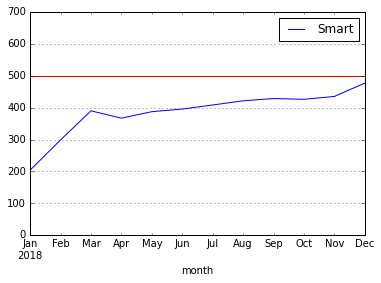

In [43]:
# сколько минут в среднем требуется тариф smart
smart_call.plot(x='month', y='mean', label="Smart", grid=True, ylim=(0, 700))
plt.axhline(y=500, color='r', linestyle='-')
plt.show()

Вывод: 
- в среднем пользователям тарифа smart требуется около 450 минут (90% от лимита), что не превышает лимит. 
- рост среднего времени разговора каждый месяц. 
- можем предположить что в следующем году, пакета бесплатных минут будет не достаточно.

In [44]:
# расчет (среднее, ст. отклонение, дисперсия) для тарифа ultra
ultra_call = ultra.groupby('month')['min'].agg(
    ['count', 'mean', 'std', 'var']).reset_index()
ultra_call.head()

,month,count,mean,std,var
0,2018-01-01,9,428.111111,269.757968,72769.361111
1,2018-02-01,24,297.125,296.512528,87919.679348
2,2018-03-01,37,489.648649,333.743765,111384.900901
3,2018-04-01,55,458.018182,267.682405,71653.870034
4,2018-05-01,67,510.328358,289.603511,83870.193578


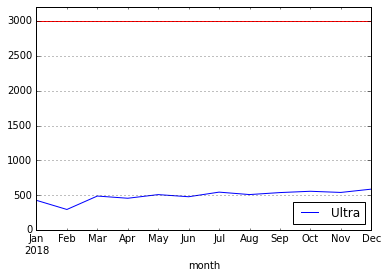

In [45]:
# сколько минут в среднем требуется тариф ultra
ultra_call.plot(x='month', y='mean', label="Ultra", grid=True, ylim=(0, 3200))
plt.axhline(y=3000, color='r', linestyle='-')
plt.show()

Вывод: 
- в среднем пользователям тарифа ultra требуется около 550 (19% от лимита) минут.
- рост среднего времени разговора каждый месяц. 

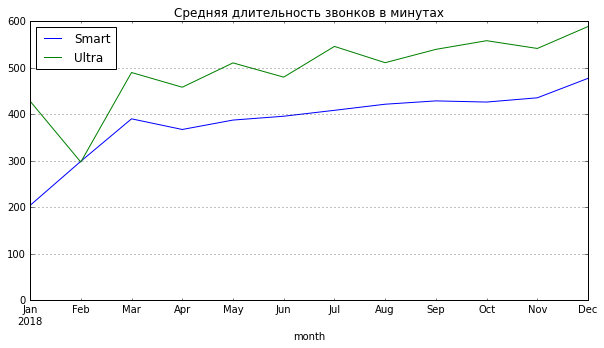

In [46]:
# среднее время разговора между тарифами
ax = smart_call.plot(x='month', y='mean', label="Smart",
                     title='Средняя длительность звонков в минутах', figsize=(10, 5))
ultra_call.plot(x='month', y='mean', label="Ultra", ax=ax, grid=True, ylim=(0))
plt.show()

Вывод:
- пользователи тарифа ultra говорят больше, в среднем на 100 минут
- в тарифе smart используется 90% от лимита, тогда как в ultra 19% от лимита

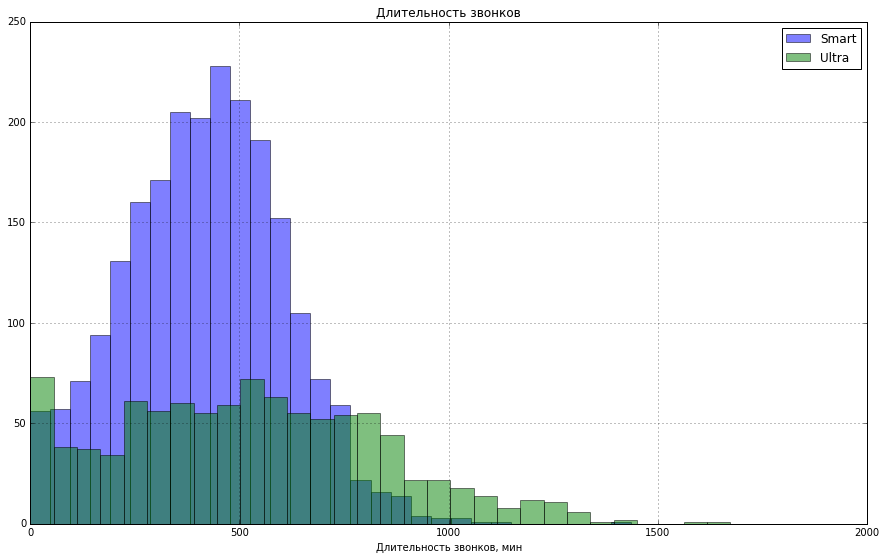

Среднее Smart: 418.0
Среднее Ultra: 526.0
Дисперсия Smart: 36265.12415310985
Дисперсия Ultra: 100950.00623331098
Стандартное отклонение Smart 190.4340414765959
Стандартное отклонение Ultra 317.7263071155912


In [47]:
# гистограмма минут разговора каждого тарифа в месяц
plt.figure(figsize=(15, 9))
smart['min'].hist(bins=30, alpha=.5)
ultra['min'].hist(bins=30, alpha=.5)

plt.title('Длительность звонков')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Длительность звонков, мин')
plt.show()

print('Среднее Smart:', np.round(smart['min'].mean()))
print('Среднее Ultra:', np.round(ultra['min'].mean()))
print('Дисперсия Smart:', np.var(smart['min']))
print('Дисперсия Ultra:', np.var(ultra['min']))
print('Стандартное отклонение Smart', np.std(smart['min']))
print('Стандартное отклонение Ultra', np.std(ultra['min']))

Вывод:
- на графике видим, что те кто пользуется тарифом ULTRA чаще превышают порог в 1000 минут в месяц.
- пользователей тарифа SMART намного больше.

### Cколько сообщений требуется пользователям каждого тарифа в месяц

In [48]:
# расчет смс (среднее, ст. отклонение, дисперсия) для тарифа smart
smart_sms = smart.groupby('month')['sms'].agg(
    ['count', 'mean', 'std', 'var']).reset_index()
smart_sms.head()

,month,count,mean,std,var
0,2018-01-01,34,18.235294,16.197753,262.367201
1,2018-02-01,58,24.086207,21.750809,473.097701
2,2018-03-01,77,31.857143,26.804710,718.492481
3,2018-04-01,112,30.741071,24.538532,602.139559
4,2018-05-01,141,33.77305,27.036845,730.990983


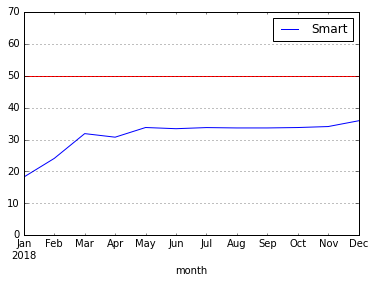

In [49]:
# сколько смс в среднем требуется тариф smart
smart_sms.plot(x='month', y='mean', label="Smart", grid=True, ylim=(0, 70))
plt.axhline(y=50, color='r', linestyle='-')
plt.show()

Вывод:
- в среднем используется 30 из 50 смс (70% от лимита)

In [50]:
# расчет смс (среднее, ст. отклонение, дисперсия) для тарифа ultra
ultra_sms = ultra.groupby('month')['sms'].agg(
    ['count', 'mean', 'std', 'var']).reset_index()
ultra_sms.head()

,month,count,mean,std,var
0,2018-01-01,9,33.777778,30.670742,940.694444
1,2018-02-01,24,21.958333,26.773574,716.824275
2,2018-03-01,37,32.297297,41.621886,1732.381381
3,2018-04-01,55,31.563636,37.513831,1407.287542
4,2018-05-01,67,37.850746,40.306874,1624.644052


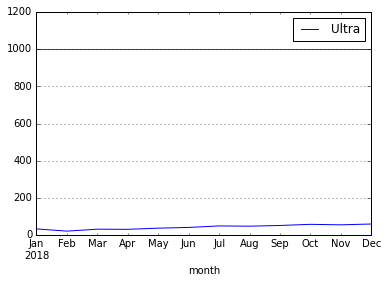

In [51]:
# сколько смс в среднем требуется тариф ultra
ultra_sms.plot(x='month', y='mean', label="Ultra", grid=True, ylim=(0, 1200))
plt.axhline(y=1000, color='r', linestyle='-')
plt.show()

Вывод:
- в среднем 50 (5% от лимита) из 1000 смс в месяц
- колличество смс растет каждый месяц 

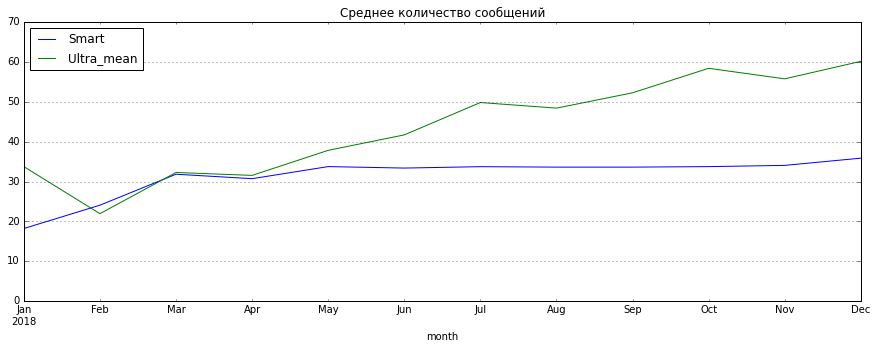

In [52]:
# сравнение тарифов
ax = smart_sms.plot(x='month', y='mean', label="Smart",
                    title='Среднее количество сообщений', figsize=(15, 5))
ultra_sms.plot(x='month', y='mean', label="Ultra_mean",
               ax=ax, grid=True, ylim=0)
plt.show()

Вывод:
- количество смс в тарифе ultra увеличивается каждый месяц
- в тарифе smart количество смс практически не меняется

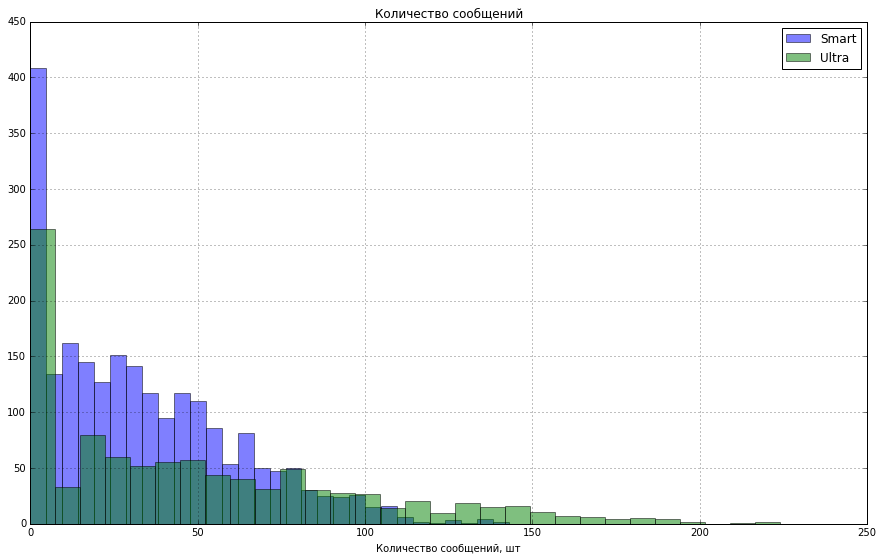

Среднее Smart: 33.0
Среднее Ultra: 49.0
Дисперсия Smart: 796.5978766916687
Дисперсия Ultra: 2283.099557085197
Стандартное отклонение Smart 28.224065559229214
Стандартное отклонение Ultra 47.78179106192229


In [53]:
# гистограмма числа смс каждого тарифа в месяц
plt.figure(figsize=(15, 9))
smart['sms'].hist(bins=30, alpha=.5)
ultra['sms'].hist(bins=30, alpha=.5)

plt.title('Количество сообщений')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество сообщений, шт')
plt.show()

print('Среднее Smart:', np.round(smart['sms'].mean()))
print('Среднее Ultra:', np.round(ultra['sms'].mean()))
print('Дисперсия Smart:', np.var(smart['sms']))
print('Дисперсия Ultra:', np.var(ultra['sms']))
print('Стандартное отклонение Smart', np.std(smart['sms']))
print('Стандартное отклонение Ultra', np.std(ultra['sms']))

Вывод:
- часть пользователей тарифа SMART превышают лимит смс в месяц и отсылают более 50шт
- в основном все пользователи трафа SMART отправляют не более 50смс
- в тарифе ULTRA смс так же не сильно популярны, в основном не более 50 при лимите в 1000

### Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

In [54]:
# расчет интернет трафика (среднее, ст. отклонение, дисперсия) для тарифа smart
smart_mb = smart.groupby('month')['mb_used'].agg(
    ['count', 'mean', 'std', 'var']).reset_index()
smart_mb.head()

,month,count,mean,std,var
0,2018-01-01,34,8513.717773,6444.680876,41533912.0
1,2018-02-01,58,11597.054688,6247.353765,39029428.0
2,2018-03-01,77,15104.159180,5828.237596,33968352.0
3,2018-04-01,112,13462.180664,5698.249058,32470042.0
4,2018-05-01,141,15805.184570,5978.231785,35739256.0


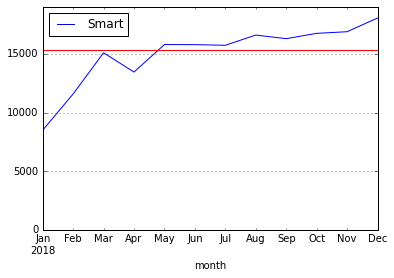

In [55]:
# сколько интернет трафика в среднем требуется тариф smart
smart_mb.plot(x='month', y='mean', label="Smart", grid=True, ylim=(0, 19000))
plt.axhline(y=15360, color='r', linestyle='-')
plt.show()

Вывод:
- в среднем используется 15064.321 (98%) из 15 360 мегабайт
- каждый месяц колличество потребляемого трафика растет
- пользователи всегда превышают лимит

In [56]:
# расчет интернет трафика (среднее, ст. отклонение, дисперсия) для тарифа ultra
ultra_mb = ultra.groupby('month')['mb_used'].agg(
    ['count', 'mean', 'std', 'var']).reset_index()
ultra_mb.head()

,month,count,mean,std,var
0,2018-01-01,9,13140.680664,6865.346844,47132988.0
1,2018-02-01,24,11775.937500,10644.643870,113308440.0
2,2018-03-01,37,17535.550781,10951.785871,119941616.0
3,2018-04-01,55,16828.134766,9718.649825,94452152.0
4,2018-05-01,67,19363.152344,10046.110207,100924328.0


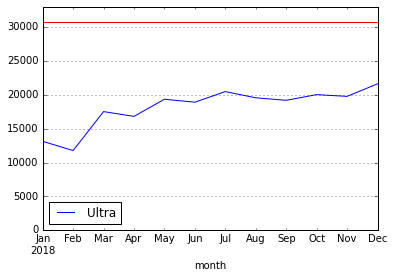

In [57]:
# сколько интернет трафика в среднем требуется тариф smart
ultra_mb.plot(x='month', y='mean', label="Ultra", grid=True, ylim=(0, 33000))
plt.axhline(y=30720, color='r', linestyle='-')
plt.show()

Вывод:
- в среднем используется 18426.125 (60%) из 30 720 мегабайт
- каждый месяц колличество потребляемого трафика растет

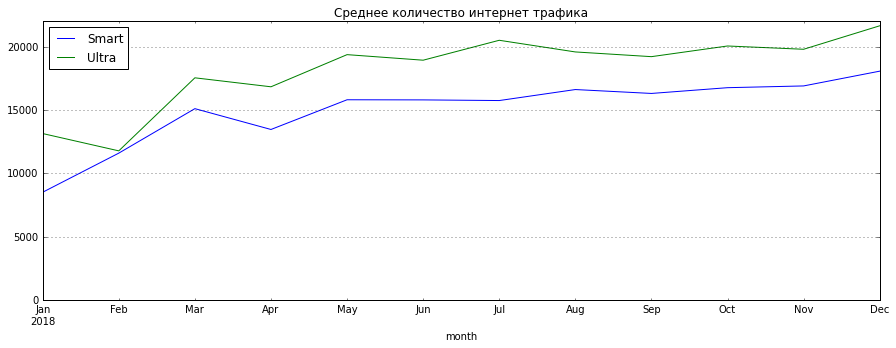

In [58]:
# сравнение тарифов
ax = smart_mb.plot(x='month', y='mean', label="Smart",
                   title='Среднee количество интернет трафика', figsize=(15, 5))
ultra_mb.plot(x='month', y='mean', label="Ultra", ax=ax, ylim=0, grid=True)
plt.show()

Вывод:
- клиенты тарифа ultra расходуют больше трафика
- наблюдается рост трафика в двух тарифах каждый месяц

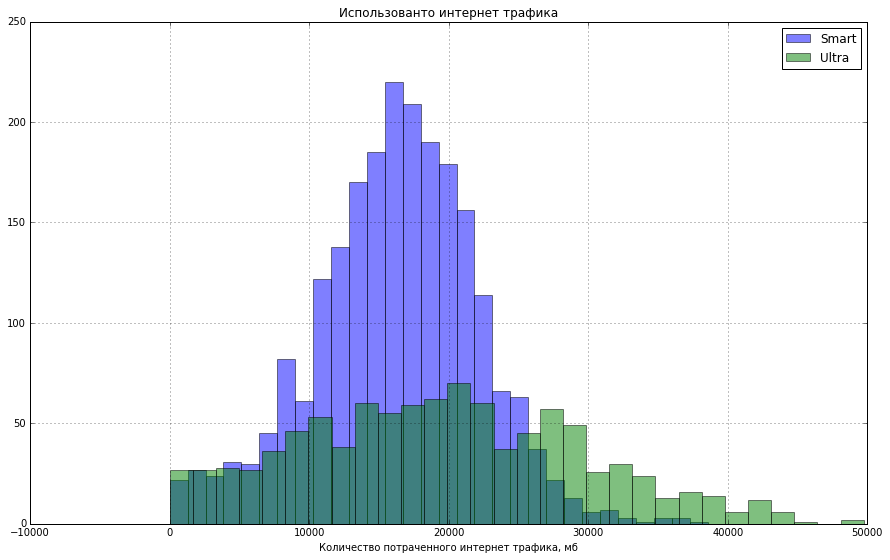

Среднее Smart: 16201.0
Среднее Ultra: 19449.0
Дисперсия Smart: 34549344.0
Дисперсия Ultra: 101928650.0
Стандартное отклонение Smart 5877.869
Стандартное отклонение Ultra 10095.972


In [59]:
# гистограмма использования интернет трафика каждого тарифа в месяц
plt.figure(figsize=(15, 9))
smart['mb_used'].hist(bins=30, alpha=.5)
ultra['mb_used'].hist(bins=30, alpha=.5)

plt.title('Использованто интернет трафика')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество потраченного интернет трафика, мб')
plt.show()

print('Среднее Smart:', np.round(smart['mb_used'].mean()))
print('Среднее Ultra:', np.round(ultra['mb_used'].mean()))
print('Дисперсия Smart:', np.var(smart['mb_used']))
print('Дисперсия Ultra:', np.var(ultra['mb_used']))
print('Стандартное отклонение Smart', np.std(smart['mb_used']))
print('Стандартное отклонение Ultra', np.std(ultra['mb_used']))

## Вывод:
- в тарифе SMART большинство пользователей используют интерент в диапазоне 10 - 22гб, при лимите в 15гб
- ULTRA распределение более ровное, в основном от 10 до 30гб, лимит 30гб

### Общий вывод:

**Звонки:**


Пользователям тарифа smart требуется около 450 минут (90% от лимита), рост среднего времени разговора каждый месяц. Можем предположить что в следующем году, пакета бесплатных минут будет не достаточно.

Тарифу ultra требуется около 550 (19% от лимита) минут, рост среднего времени разговора каждый месяц.

**Сообщения:**


smart в среднем отправляется 30 из 50 смс (70% от лимита)

ultra в среднем 50 (5% от лимита) из 1000 смс в месяц
колличество смс растет каждый месяц

**Интернет:**


smart в среднем используется 15 064 (98%) из 15 360 мегабайт, каждый месяц колличество потребляемого трафика растет.
Пользователи почти всегда превышают лимит

ultra в среднем используется 18 426 (60%) из 30 720 мегабайт, каждый месяц колличество потребляемого трафика растет

## Проверка гипотез

### проверить гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

**H0:** средняя выручка пользователей тарифов «Ультра» и «Смарт» **равны**


**H1:** средняя выручка пользователей тарифов «Ультра» и «Смарт» **различаются** 

In [61]:
# t-test - Гипотеза о равенстве средних двух генеральных совокупностей
alpha = .05

results = st.ttest_ind(
    smart['total'],
    ultra['total'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.9270113944209404e-250
Отвергаем нулевую гипотезу


Вывод:
- вроятность того что средние выручки двух тарифов равны **<1%**. Следовательно мы отвергаем гипотеу о том, что выручки равны, и **подтверждаем гипотезу о том что средние выручки различаются**.

### средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

**Н0:** средняя выручка пользователей из Москвы **равна** выручке пользователей из других регионов

**Н1:** средняя выручка пользователей из Москвы **отличается** от выручки пользователей из других регионов

In [62]:
# таблица общая
df = (df_revenue
      .merge(smart, how='outer', on=['user_id', 'month'])
      .merge(ultra, how='outer', on=['user_id', 'month'])
      .fillna(0)
      )
df['total'] = df['total_y'] + df['total_x']

In [63]:
# отфильтровал по нужным столбцам
df = df[['user_id', 'month', 'total']]

In [64]:
# добавил город
df = pd.merge(df, df5[['user_id', 'city']], on='user_id', how='left')

In [65]:
df

,user_id,month,total,city
0,1000,2018-05-01,1950.0,Краснодар
1,1000,2018-06-01,1950.0,Краснодар
2,1000,2018-07-01,1950.0,Краснодар
3,1000,2018-08-01,1950.0,Краснодар
4,1000,2018-09-01,1950.0,Краснодар
...,...,...,...,...
3211,1489,2018-09-01,950.0,Санкт-Петербург
3212,1489,2018-10-01,1550.0,Санкт-Петербург
3213,1489,2018-11-01,1150.0,Санкт-Петербург
3214,1489,2018-12-01,950.0,Санкт-Петербург


In [66]:
# t-test - Гипотеза о равенстве средних двух генеральных совокупностей
alpha = .05

results = st.ttest_ind(
    df[df['city'] == 'Москва']['total'],
    df[df['city'] != 'Москва']['total'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5216952110000281
Не получилось отвергнуть нулевую гипотезу


Вывод: 
- **Н0 гипотеза верна**: средняя выручка пользователей из Москвы **равна** выручке пользователей из других регионов, с вероятностью 52%

In [67]:
# проверка
print(smart['total'].sum() + ultra['total'].sum())
print(df['total'].sum())

4916951.0
4916951.0


## Расчеты для выводов и рекомендаций

In [68]:
print('SMART', (df5['tariff'] == 'smart').sum(), 'пользователей')
print('процент от общего числа', round(
    (df5['tariff'] == 'smart').sum() / 500 * 100), '%')
print()

print('ULTRA', (df5['tariff'] != 'smart').sum(), 'пользователей')
print('процент от общего числа', round(
    (df5['tariff'] != 'smart').sum() / 500 * 100), '%')
print()

print('всего 500 пользователей в выборке')

SMART 351 пользователей
процент от общего числа 70 %

ULTRA 149 пользователей
процент от общего числа 30 %

всего 500 пользователей в выборке


In [69]:
print('Тратится минут в среднем за месяц SMART', round(smart['min'].mean()))
print('в процентах от лимита тарифа', round(
    smart['min'].mean() / 500 * 100), '%')
print('среднее время одного звонка',
      round(smart['min'].sum() / smart['count_call'].sum(), 2))
print()

print('Тратится минут в среднем за месяц ULTRA', round(ultra['min'].mean()))
print('в процентах от лимита тарифа', round(
    ultra['min'].mean() / 3000 * 100), '%')
print('среднее время одного звонка',
      round(ultra['min'].sum() / ultra['count_call'].sum(), 2))

Тратится минут в среднем за месяц SMART 418
в процентах от лимита тарифа 84 %
среднее время одного звонка 7.15

Тратится минут в среднем за месяц ULTRA 526
в процентах от лимита тарифа 18 %
среднее время одного звонка 7.18


In [70]:
print('СМС на пользователя в месяц SMART', round(smart['sms'].mean()))
print('потрачено от лимита', round(smart['sms'].mean() / 50 * 100), '%')
print()

print('СМС на пользователя в месяц ULTRA', round(ultra['sms'].mean()))
print('потрачено от лимита', round(ultra['sms'].mean() / 1000 * 100), '%')

СМС на пользователя в месяц SMART 33
потрачено от лимита 67 %

СМС на пользователя в месяц ULTRA 49
потрачено от лимита 5 %


In [71]:
print('Тратится мегбайт в месяц SMART', round(smart['mb_used'].mean(), 2))
print('потрачено от лимита', round(
    smart['mb_used'].mean() / 15360 * 100 + 1), '%')
print()

print('Количество потраченных мегбайт в месяц ULTRA',
      round(ultra['mb_used'].mean(), 2))
print('потрачено от лимита', round(
    ultra['mb_used'].mean() / 30720 * 100 + 1), '%')

Тратится мегбайт в месяц SMART 16201.12
потрачено от лимита 106 %

Количество потраченных мегбайт в месяц ULTRA 19449.06
потрачено от лимита 64 %


In [72]:
print('Всего денег заработано SMART', smart['total'].sum())
print(round(smart['total'].sum() /
      (smart['total'].sum() + ultra['total'].sum()) * 100, 2), '%')
print('средний чек', round(smart['total'].mean()))
print()

print('Всего денег заработано ULTRA', ultra['total'].sum())
print(round(ultra['total'].sum() /
      (smart['total'].sum() + ultra['total'].sum()) * 100, 2), '%')
print('средний чек', round(ultra['total'].mean()))

Всего денег заработано SMART 2875901.0
58.49 %
средний чек 1290

Всего денег заработано ULTRA 2041050.0
41.51 %
средний чек 2070


## Общий вывод:

**тариф SMART:**
    
        - количество пользователей тарифа 70%,        
        - тратится минут в среднем за месяц 418 (от лимита 84%),
        - среднее время одного звонка 7.15,
        - СМС на пользователя в месяц 33 сообщения (от лимита 67%),
        - расход мегбайт в месяц 16208.39 (от лимита 107%),
        - всего денег заработано 2875351 (от общего 58.51%),
        - средний чек 1290


**тариф ULTRA:**
        
        - количество пользователей тарифа 30%,        
        - тратится минут в среднем за месяц 527 (от лимита 18%),
        - среднее время одного звонка 7.18,
        - СМС на пользователя в месяц 49 сообщения (от лимита 5%),
        - расход мегбайт в месяц 19468.8 (от лимита 64%),
        - всего денег заработано 2039100 (от общего 41.49%),
        - средний чек 2070

Тариф SMART более массовый - 70% от всех пользователей, можно связать это с ценой тарифа - 550р (ULTRA стоит почти в 4 раза дороже - 1950р). 

Пользователи практически одинаково говорят по телефону 418 минунт за месяц и 527 минут в тарифе ULTRA, причем в тарифе SMART каждый месяц растет среднее потраченых минут, можно с увереностью говорить что в следующем году всем пользователям не будет хватать лимита в 500 минут. 

Интернета в тарифе SMART уже не хватает, идет превышение на 2 гб в месяц. В тарифе ULTRA интернета расходуют 64% от лимита. 

Срдений чек тарифа смарт 1290р, срдений чек тарифа ULTRA 2070р, 70%(тариф SMART) пользователей приносят 59% общей выручки, 30%(тариф ULTRA) приносят 41% от общей выручки.

## Ответ на вопросы

**Какой тариф приносит больше денег?**

        - SMART
        
        
**Какой тариф лучше?**

        - можно сказать что пользователи тарифа SMART используют лимиты тарифа на 86%, если смотреть по лимиту интернета, то привышают его и переплачивают. Еще можно с увереностью говорить что в следующем году дополнительно будут платить за минуты. Можно сказать тариф для экономных и рациональных людей.
        
        - пользователи ULTRA используют тариф на 30% от заданых лимитов. С психологической точки зрения им не нужно постоянно следить и проверять остаток лимита, поэтому тариф более комфортный.